# Task 1

---

## Web scraping and analysis

We will use a package called `BeautifulSoup` to collect the data from the web. Once we've collected the data and saved it into a local `.csv` file we start with the analysis.

### Scraping data from Skytrax

If we visit [https://www.airlinequality.com] we can see that there is a lot of data there. For now, we are only interested in reviews related to British Airways and the Airline itself.
If we navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] we will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [52]:
# importing necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
page_size = 100
reviews = []
page_number = 1

while True:
    print(f"Scraping page {page_number}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{page_number}/?sortby=post_date%3ADesc&pagesize={page_size}"
    # Collect HTML data from this page
    response = requests.get(url)
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    review_divs = parsed_content.find_all("div", {"class": "text_content"})
    if len(review_divs) == 0:
        print(f"   ---> {len(review_divs)} total reviews")
        break  # Exit the loop if there are no more reviews on the page
    
    for review_div in review_divs:
        reviews.append(review_div.get_text())
    print(f"   ---> {len(reviews)} total reviews")

    page_number += 1

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

### **Storing Dataset in Pandas Dataframe**

In [ ]:
# using pandas dataframe
df = pd.DataFrame()
df["reviews"] = reviews

# displaying rows from the dataset
df.head()

,reviews
0,✅ Trip Verified | Most uncomfortable flight I...
1,✅ Trip Verified | I booked our first out of c...
2,✅ Trip Verified | My husband and I booked seat...
3,"Not Verified | May 3, flew from Seattle to He..."
4,✅ Trip Verified | I went through three flights...


### **Saving Results in a File**

In [ ]:
# storing results in a .csv file
df.to_csv("data/BA_reviews.csv")

### **Data Cleaning**

In [ ]:
# Data cleaning
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean the text data
def clean_text(text):
    # Remove '|' and the content before it using regular expressions
    text = re.sub(r'^.*?\|', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = text.replace("[^a-zA-Z#]", " ")
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply the clean_text function to the 'reviews' column
df['reviews'] = df['reviews'].apply(clean_text)
print("\n ---> CLEANED DATASET\n------------------------------------------------------\n")
print(df.head())
print("------------------------------------------------------\n")


 ---> CLEANED DATASET
------------------------------------------------------

                                             reviews
0  uncomfortable flight ever experienced. long ti...
1  booked first country trip take husband surpris...
2  husband booked seats within premium economy bo...
3  may 3, flew seattle heathrow edinburgh. ba los...
4  went three flights reach destination. ba fligh...
------------------------------------------------------



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Wordcloud Visualization**


◈ WORDCLOUD VISUALIZATION



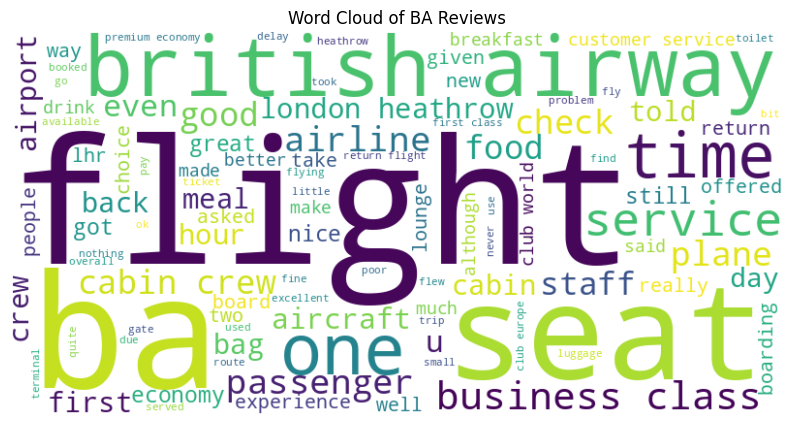

In [ ]:
# Word cloud visualization
print("\n◈ WORDCLOUD VISUALIZATION\n")
all_text = ' '.join(df['reviews'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of BA Reviews')
plt.show()

### **Topic Modeling**

In [ ]:
# Topic modeling
print("\n◈ TOPIC MODELING\n")
vectorizer = CountVectorizer(max_features=1000, max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['reviews'])

# LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Print the topics and their top words
feature_names = vectorizer.get_feature_names_out()

for index, topic in enumerate(lda_model.components_):
    print(f"Topic #{index}")
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(top_words)
    print()

# Assign topics to each review
topic_assignments = lda_model.transform(X)
df['topic'] = topic_assignments.argmax(axis=1)

# Analyze the distribution of topics
topic_counts = df['topic'].value_counts()

# Print insights
print("Topic Distribution:")
print(topic_counts)


◈ TOPIC MODELING

Topic #0
['flight', 'ba', 'check', 'luggage', 'hours', 'staff', 'time', 'airport', 'boarding', 'london']

Topic #1
['flight', 'good', 'crew', 'service', 'food', 'time', 'lounge', 'cabin', 'ba', 'london']

Topic #2
['flight', 'ba', 'service', 'crew', 'food', 'cabin', 'staff', 'airline', 'london', 'british']

Topic #3
['flight', 'airways', 'british', 'ba', 'london', 'service', 'seats', 'customer', 'seat', 'booked']

Topic #4
['seat', 'ba', 'class', 'seats', 'business', 'food', 'economy', 'flight', 'cabin', 'club']

Topic Distribution:
4    1077
1     902
2     593
0     518
3     478
Name: topic, dtype: int64


### **Key-Phrase Extraction**

In [ ]:
# Key-phrase Extraction
print("\n◈ KEY-PHRASE EXTRACTION\n")

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Split the reviews into smaller batches
batch_size = 100
reviews_batches = [df['reviews'][i:i+batch_size] for i in range(0, len(df['reviews']), batch_size)]

# Process each batch and extract key phrases
key_phrases = []
for batch in reviews_batches:
    combined_text = ' '.join(batch)
    doc = nlp(combined_text)
    key_phrases.extend([chunk.text for chunk in doc.noun_chunks])

print(" ---> Key Phrases:")
print(key_phrases)


◈ KEY-PHRASE EXTRACTION

 ---> Key Phrases:
['uncomfortable flight', 'conditions', 'person', 'front', 'it', 'ba', 'economy uncomfortable encourage customers', 'me', 'ba future', 'onward flight latam', '787 aircraft room rows', 'return flight santiago lights', 'cabin crew', 'service', 'curtains', 'first country trip', 'husband surprise trip monaco', 'us', '3 hours', 'flight home heathrow', 'flight', 'seattle hour', 'us', 'connecting flight', 'us', 'flight', 'food tickets type reimbursement', 'additionally sat customer service line hour half see', 'us', 'customers', 'queue', 'france airport', 'rental car desk', 'found cab', 'us', '85 euros', 'hotel', 'something', 'way', 'flight nice heathrow', '2.5 hour layover', 'flight', 'unfortunately long security lines', '1.5 hr delay', 'arriving ba closed doors', 'plane', '15mins departure', 'heathrow airport', 'security', 'us', 'back customer service queue', 'first statement', 'us', 'another airline', 'time', 'bags transferred flight delta', '8 p

In [ ]:

# Key-phrase Extraction
print("\n◈ KEY-PHRASE EXTRACTION\n")

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the first 500 reviews and extract key phrases
combined_text = ' '.join(df['reviews'].head(100))
doc = nlp(combined_text)
key_phrases = [chunk.text for chunk in doc.noun_chunks]

print(" ---> Key Phrases:")
print(key_phrases)


◈ KEY-PHRASE EXTRACTION

 ---> Key Phrases:
['uncomfortable flight', 'conditions', 'person', 'front', 'it', 'ba', 'economy uncomfortable encourage customers', 'me', 'ba future', 'onward flight latam', '787 aircraft room rows', 'return flight santiago lights', 'cabin crew', 'service', 'curtains', 'first country trip', 'husband surprise trip monaco', 'us', '3 hours', 'flight home heathrow', 'flight', 'seattle hour', 'us', 'connecting flight', 'us', 'flight', 'food tickets type reimbursement', 'additionally sat customer service line hour half see', 'us', 'customers', 'queue', 'france airport', 'rental car desk', 'found cab', 'us', '85 euros', 'hotel', 'something', 'way', 'flight nice heathrow', '2.5 hour layover', 'flight', 'unfortunately long security lines', '1.5 hr delay', 'arriving ba closed doors', 'plane', '15mins departure', 'heathrow airport', 'security', 'us', 'back customer service queue', 'first statement', 'us', 'another airline', 'time', 'bags transferred flight delta', '8 p

### **Sentiment Analysis**

In [ ]:
# Sentiment analysis
print("\n◈ SENTIMENT ANALYSIS\n")
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Analysis of sentiment scores
positive_reviews = df[df['sentiment_score'] > 0]
negative_reviews = df[df['sentiment_score'] < 0]
neutral_reviews = df[df['sentiment_score'] == 0]

# Print insights
print(f" ---> Total number of reviews: {len(df)}")
print(f" ---> Number of positive reviews: {len(positive_reviews)}")
print(f" ---> Number of negative reviews: {len(negative_reviews)}")
print(f" ---> Number of neutral reviews: {len(neutral_reviews)}")


◈ SENTIMENT ANALYSIS

 ---> Total number of reviews: 3568
 ---> Number of positive reviews: 2405
 ---> Number of negative reviews: 1147
 ---> Number of neutral reviews: 16


### **Line Plot Visualization**

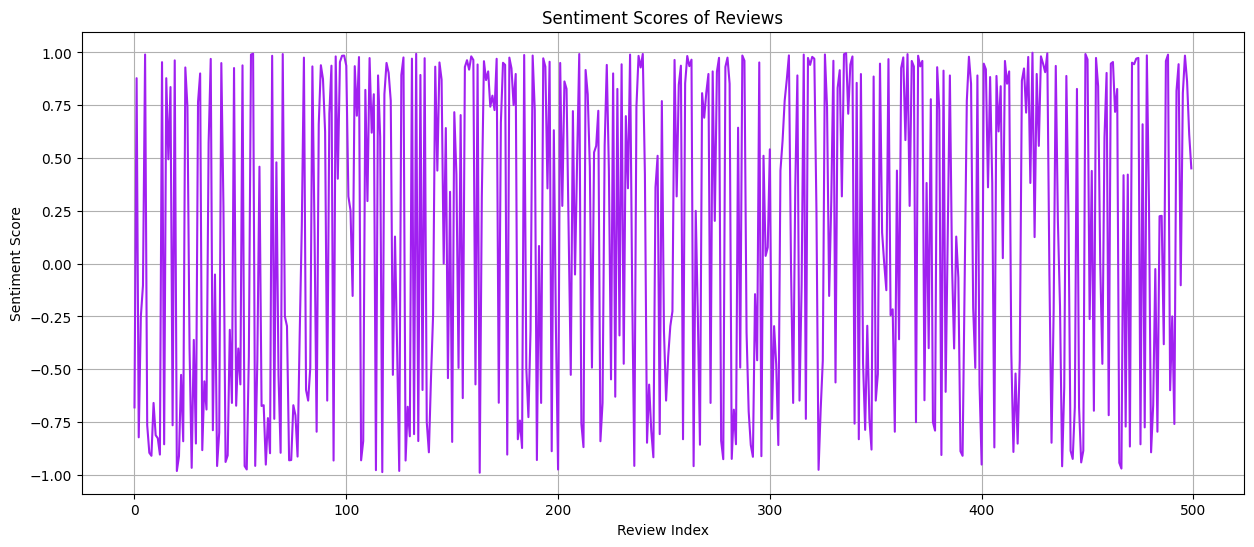

In [ ]:
# Get the sentiment scores
sentiment_scores = df['sentiment_score'].head(500)

# Plotting the line plot
plt.figure(figsize=(15, 6))
plt.plot(sentiment_scores, color='#A020F0')
plt.xlabel('Review Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores of Reviews')
plt.grid(True)
plt.show()

### **Pie-Chart Visualization**


◈ SENTIMENT SCORE DISTRIBUTION



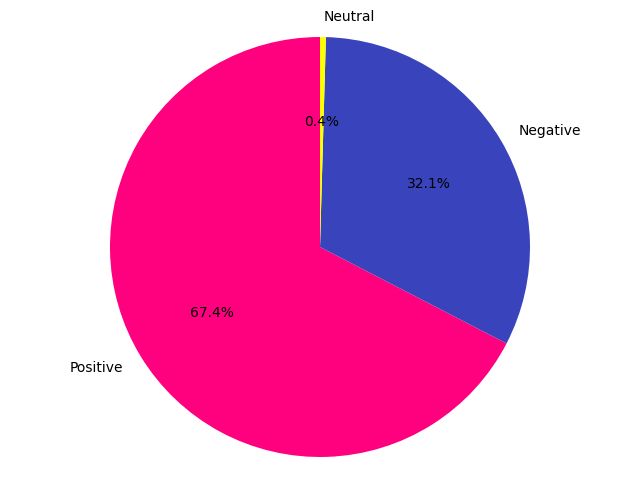

In [ ]:
# Count the number of reviews in each sentiment category
positive_count = len(positive_reviews)
negative_count = len(negative_reviews)
neutral_count = len(neutral_reviews)

# Calculate the percentages
total_reviews = len(df)
positive_percentage = (positive_count / total_reviews) * 100
negative_percentage = (negative_count / total_reviews) * 100
neutral_percentage = (neutral_count / total_reviews) * 100

# Data for the pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['#FF007F', '#3944BC', '#FFFF00']

# Plotting the pie chart
print("\n◈ SENTIMENT SCORE DISTRIBUTION\n")
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
# Saving clean dataset in a .csv file
print(df.head())
df.to_csv("data/BA_clean_reviews.csv")

                                             reviews  topic  sentiment_score
0  uncomfortable flight ever experienced. long ti...      4          -0.6808
1  booked first country trip take husband surpris...      0           0.8779
2  husband booked seats within premium economy bo...      2          -0.8225
3  may 3, flew seattle heathrow edinburgh. ba los...      3          -0.2500
4  went three flights reach destination. ba fligh...      0          -0.1038
